In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [5]:
movies = pd.read_csv("https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/movies.dat",names=['IDMovies','NameMovies','Genres'], sep="::", engine='python')
ratings = pd.read_csv("https://raw.githubusercontent.com/sidooms/MovieTweetings/master/latest/ratings.dat",sep="::",names=['UserID','IDMovies','Rating','Timestamp'], engine='python')

In [6]:
movies.head()

,IDMovies,NameMovies,Genres
0,8,Edison Kinetoscopic Record of a Sneeze (1894),Documentary|Short
1,10,La sortie des usines Lumière (1895),Documentary|Short
2,12,The Arrival of a Train (1896),Documentary|Short
3,25,The Oxford and Cambridge University Boat Race ...,NaN
4,91,Le manoir du diable (1896),Short|Horror


In [7]:
ratings.head()

,UserID,IDMovies,Rating,Timestamp
0,1,114508,8,1381006850
1,2,499549,9,1376753198
2,2,1305591,8,1376742507
3,2,1428538,1,1371307089
4,3,75314,1,1595468524


In [8]:
df=pd.merge(ratings,movies,on='IDMovies')

In [9]:
df.head()

,UserID,IDMovies,Rating,Timestamp,NameMovies,Genres
0,1,114508,8,1381006850,Species (1995),Action|Horror|Sci-Fi|Thriller
1,2,499549,9,1376753198,Avatar (2009),Action|Adventure|Fantasy|Sci-Fi
2,2,1305591,8,1376742507,Mars Needs Moms (2011),Animation|Adventure|Family|Sci-Fi
3,2,1428538,1,1371307089,Hansel &amp; Gretel: Witch Hunters (2013),Action|Fantasy|Horror
4,3,75314,1,1595468524,Taxi Driver (1976),Crime|Drama


In [10]:
Rating=df[df['Rating']==10]
Rating.head()

,UserID,IDMovies,Rating,Timestamp,NameMovies,Genres
6,3,114369,10,1597555347,Se7en (1995),Crime|Drama|Mystery|Thriller
23,3,8579674,10,1579261830,1917 (2019),Drama|War
31,5,1343092,10,1368224599,The Great Gatsby (2013),Drama|Romance
35,5,2084970,10,1430699754,The Imitation Game (2014),Biography|Drama|Thriller|War
41,7,2980516,10,1425239129,The Theory of Everything (2014),Biography|Drama|Romance


C:\Users\Asus\AppData\Local\Temp\ipykernel_26072\189908163.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df, palette='viridis')


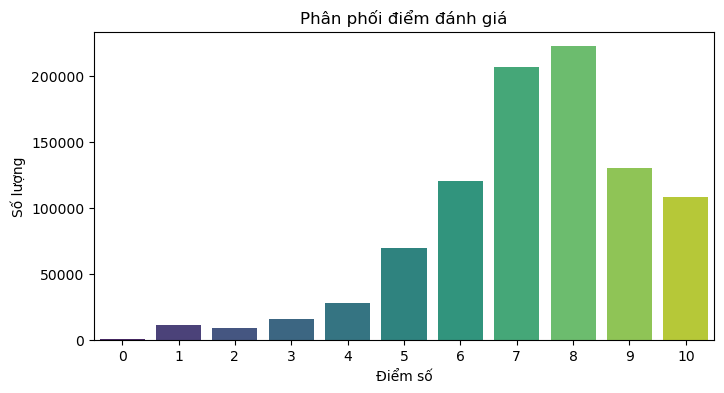

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(x='Rating', data=df, palette='viridis')
plt.title('Phân phối điểm đánh giá')
plt.xlabel('Điểm số')
plt.ylabel('Số lượng')
plt.show()

In [12]:
movies_stats=df.groupby('NameMovies')['Rating'].agg(['mean','count'])

In [13]:
movies_stats.head()

,mean,count
NameMovies,,
$ (1971),6.333333,3
$30 (1999),5.000000,1
$5 a Day (2008),6.666667,3
$50K and a Call Girl: A Love Story (2014),5.666667,9
$ellebrity (2012),5.000000,3


<Figure size 800x600 with 0 Axes>

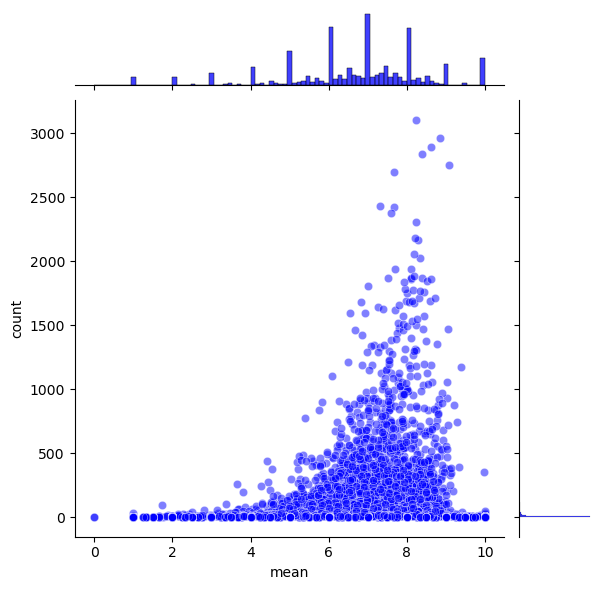

In [14]:
plt.figure(figsize=(8,6))
sns.jointplot(x='mean', y='count', data=movies_stats, alpha=0.5, color='blue')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923235 entries, 0 to 923234
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   UserID      923235 non-null  int64 
 1   IDMovies    923235 non-null  int64 
 2   Rating      923235 non-null  int64 
 3   Timestamp   923235 non-null  int64 
 4   NameMovies  923235 non-null  object
 5   Genres      922876 non-null  object
dtypes: int64(4), object(2)
memory usage: 42.3+ MB


In [16]:
movie50=df['NameMovies'].value_counts()>=50
movie50=movie50[movie50].index
UserID20=df['UserID'].value_counts()>=20
UserID20=UserID20[UserID20].index
df_filtered = df[df['NameMovies'].isin(movie50) & df['UserID'].isin(UserID20)]
df_filtered.head()

,UserID,IDMovies,Rating,Timestamp,NameMovies,Genres
4,3,75314,1,1595468524,Taxi Driver (1976),Crime|Drama
5,3,102926,9,1590148016,The Silence of the Lambs (1991),Crime|Drama|Thriller
6,3,114369,10,1597555347,Se7en (1995),Crime|Drama|Mystery|Thriller
7,3,118715,8,1596006798,The Big Lebowski (1998),Comedy|Crime
8,3,120737,8,1599306720,The Lord of the Rings: The Fellowship of the R...,Adventure|Drama|Fantasy


In [17]:
use_movies = df_filtered.pivot_table(index='UserID', columns='NameMovies', values='Rating')
use_movies.head()

NameMovies,'71 (2014),...and justice for all. (1979),10 Cloverfield Lane (2016),10 Things I Hate About You (1999),10 Years (2011),12 Angry Men (1957),12 Feet Deep (2017),12 Strong (2018),12 Years a Slave (2013),127 Hours (2010),...,Zodiac (2007),Zombieland (2009),Zombieland: Double Tap (2019),Zoolander (2001),Zoolander 2 (2016),Zootopia (2016),[Rec] (2007),iBoy (2017),xXx: Return of Xander Cage (2017),À bout de souffle (1960)
UserID,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN
54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
target_movies= 'The Matrix (1999)'

In [19]:
target_rating = use_movies[target_movies]
target_rating.head()

UserID
3    NaN
39   NaN
47   NaN
54   NaN
56   NaN
Name: The Matrix (1999), dtype: float64

In [21]:
similar_scores= use_movies.corrwith(target_rating)
corr_df = pd.DataFrame(similar_scores, columns=['Correlation'])
corr_df.dropna(inplace=True)
corr_df = corr_df.join(movies_stats['count'])
final_recommendation = corr_df[corr_df['count'] > 50].sort_values(by='Correlation', ascending=False)
final_recommendation.head()

C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:3057: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\Asus\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:2914: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


,Correlation,count
NameMovies,,
22 July (2018),1.0,73
A Fall from Grace (2020),1.0,139
Vehicle 19 (2013),1.0,64
The Expatriate (2012),1.0,100
We Are What We Are (2013),1.0,64
